In [48]:
import numpy as np
from scipy import linalg as la
from scipy import integrate as integ

import matplotlib.pyplot as plt

In [49]:
def integrate(f, a, b):
    x = np.linspace(a, b, 5000)
    return integ.trapezoid(f(x), x)

In [50]:
def get_phi_functions(n, a, b):
    grid = np.linspace(a, b, n + 2)
    h = grid[1] - grid[0]

    def phi(j):
        def f(x):
            if grid[j] < x <= grid[j + 1]:
                return (x - grid[j]) / h
            elif grid[j + 1] < x < grid[j + 2]:
                return (grid[j + 2] - x) / h
            else:
                return 0

        return f

    phis = []
    for i in range(n):
        phis.append(np.frompyfunc(phi(i), 1, 1))

    return phis


In [51]:
def get_derivative_phi(n, a, b):
    grid = np.linspace(a, b, n + 2)
    h = grid[1] - grid[0]

    def dphi(i):
        def f(x):
            if grid[i] < x <= grid[i + 1]:
                return 1 / h
            elif grid[i + 1] < x < grid[i + 2]:
                return - 1 / h
            else:
                return 0

        return f

    phis = []
    for i in range(n):
        phis.append(np.frompyfunc(dphi(i), 1, 1))

    return phis

In [52]:
def get_lbase(p, q, r, f, segment, n):
    a, b = segment
    M = np.zeros( (n, n) )
    phis = get_phi_functions(n, a, b)
    d_phis = get_derivative_phi(n, a, b)

    for i in range(n):
        for j in range(n):
            phi_i, d_phi_i = phis[i], d_phis[i]
            phi_j, d_phi_j = phis[j], d_phis[j]
            func = lambda x: p(x) * d_phi_i(x) * d_phi_j(x) + q(x) * phi_i(x) * d_phi_j(x) + r(x) * phi_i(x) * phi_j(x)
            M[i, j] = integrate(func, a, b)

    return M

In [53]:
def get_rbase(p, q, r, f, segment, n):
    a, b = segment
    x = np.linspace(a, b, n + 2)
    h = x[1] - x[0]

    def each(i):
        return 1 / h * (-x[i] * integrate(f, x[i], x[i + 1]) + x[i + 2] * integrate(f, x[i + 1], x[i + 2]) + integrate(
            (lambda x: x * f(x)), x[i], x[i + 1]) - integrate(lambda x: x * f(x), x[i + 1], x[i + 2]))

    return [each(i) for i in range(n)]

In [54]:

def finite_elements_method(p, q, r, f, segment, n):
    a, b = segment
    phis = get_phi_functions(n, a, b)
    alphas = la.solve(get_lbase(p, q, r, f, segment, n), get_rbase(p, q, r, f, segment, n))

    return lambda x: sum(alpha * phi(x) for alpha, phi in zip(alphas, phis))

In [55]:
def experiment(p, q, r, f, segment, n_range):
    _, axes = plt.subplots(2, 2, figsize=(20, 12))

    k = 0
    for i in range(2):
        for j in range(2):
            n = n_range[k]
            k += 1

            a, b = segment
            u = finite_elements_method(p, q, r, f, segment, n)
            grid = np.linspace(a, b, 100)

            axes[i, j].plot(grid, u(grid),marker='.', color='red', mec='black', ms=10)
            axes[i, j].set_title(f" N = {n}")

    

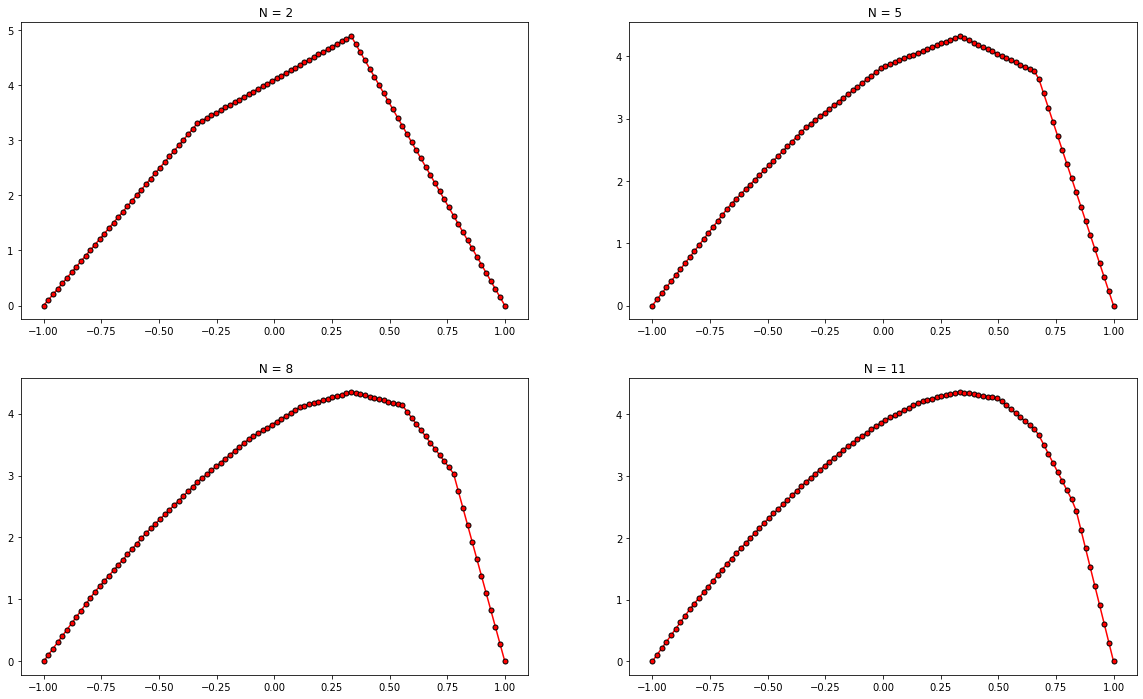

In [56]:
# Var 5
p = lambda x: - 1 / (x + 3)
q = lambda x: - x
r = lambda x: np.log(2 + x)
f = lambda x: 1 - x / 2

segment = (-1, 1)
experiment(p, q, r, f, segment, [2, 5, 8, 11])

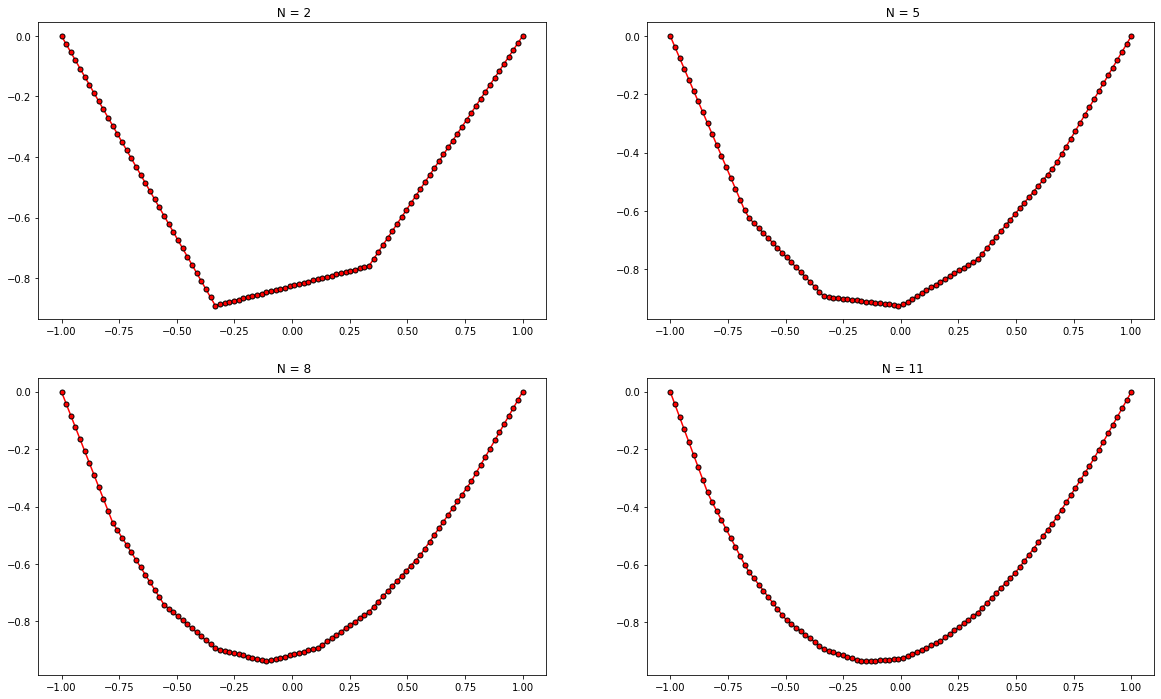

In [57]:
# Var 8
p = lambda x: -(4 - x) / (5 - 2 * x)
q = lambda x: (1 - x)/2
r = lambda x: np.log(3 + x) / 2
f = lambda x: 1 + x / 3

segment = (-1, 1)
experiment(p, q, r, f, segment, [2, 5, 8, 11])

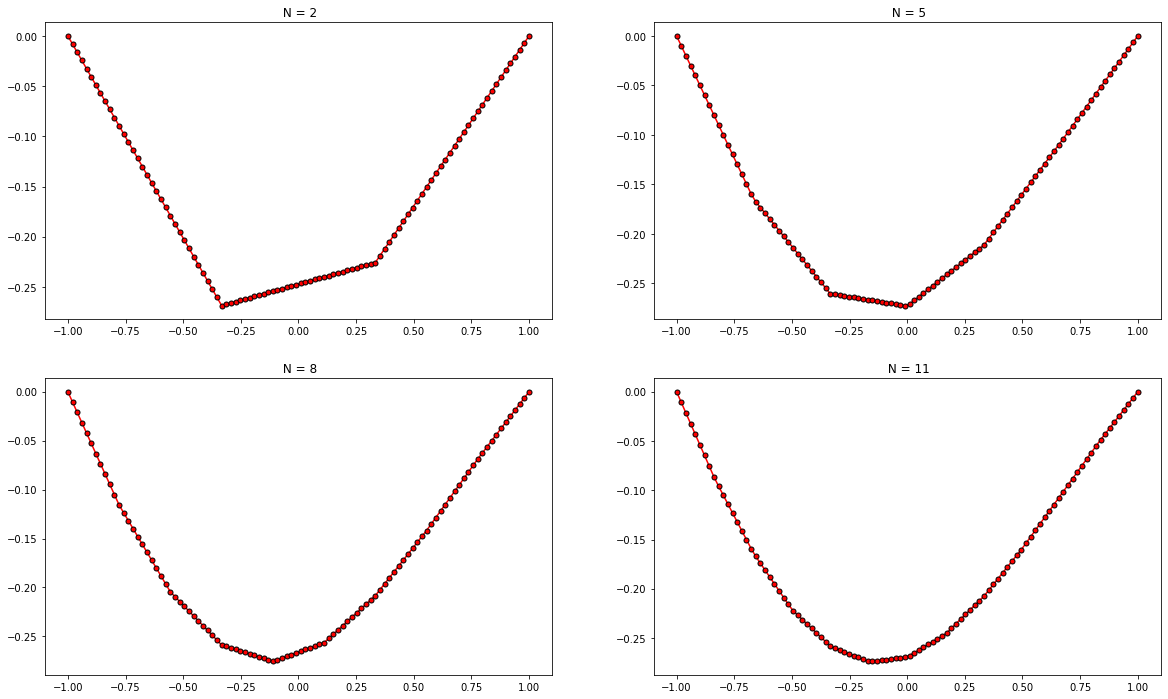

In [58]:
# Var 11
p = lambda x: -(7 - x)/(8 + 3 * x)
q = lambda x: (1 + x / 3)
r = lambda x: (1 - np.exp(x / 2) / 2)
f = lambda x: 1/2 - x / 3 

segment = (-1, 1)
experiment(p, q, r, f, segment, [2, 5, 8, 11])

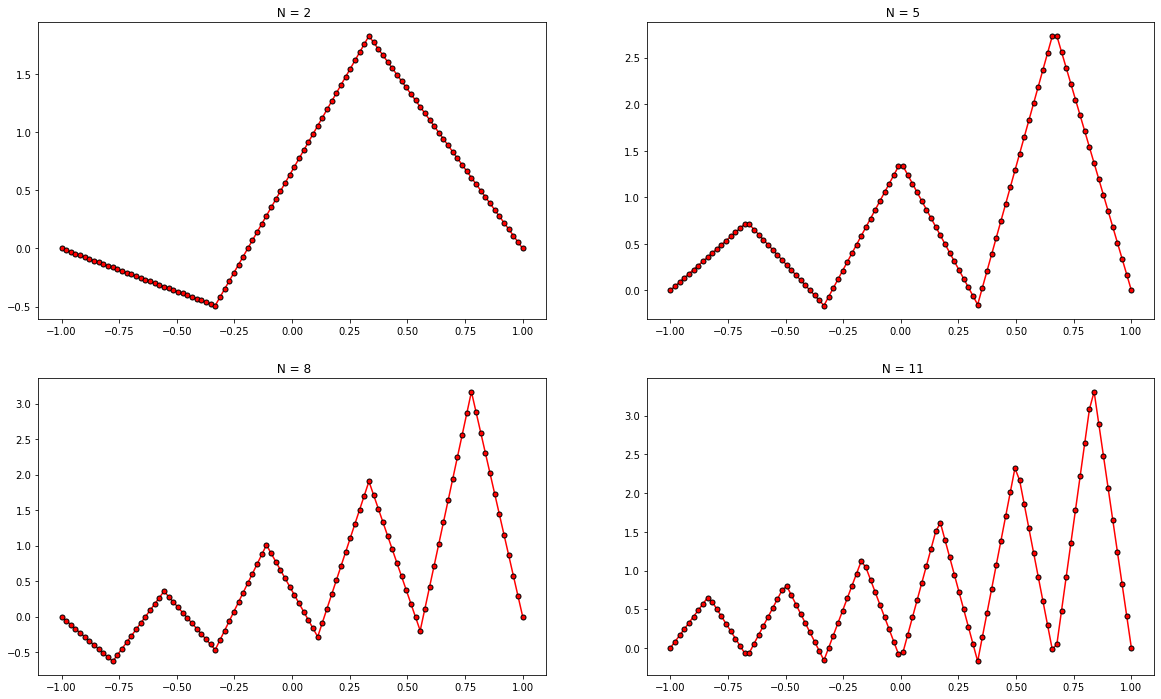

In [59]:
p = lambda x: 0
q = lambda x: 1 / (2 + x)
r = lambda x: np.cos(x)
f = lambda x: 1 + x
segment = (-1, 1)
experiment(p, q, r, f, segment, [2, 5, 8, 11])